In [1]:
# Installing Pillow Libraries
!pip install scikit-learn matplotlib Pillow

In [2]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image

In [3]:
cfw_dict = {
    'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7
}

opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}

In [4]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs,classes,row=1,col=2,w=32,h=32):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = []
    y_list = []
    label_dict = cfw_dict
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue
    image_list = np.array(image_list)
    y_list = np.array(y_list)
    print("Dataset shape:",image_list.shape)
    print("Label shape:",y_list.shape)

    return image_list,y_list

In [5]:
dirpath = 'SMAI-PCAdataset/IIIT-CFW/'
X,y = load_data(dirpath)
y_cfw = y

Dataset shape: (672, 32, 32, 3)
Label shape: (672,)


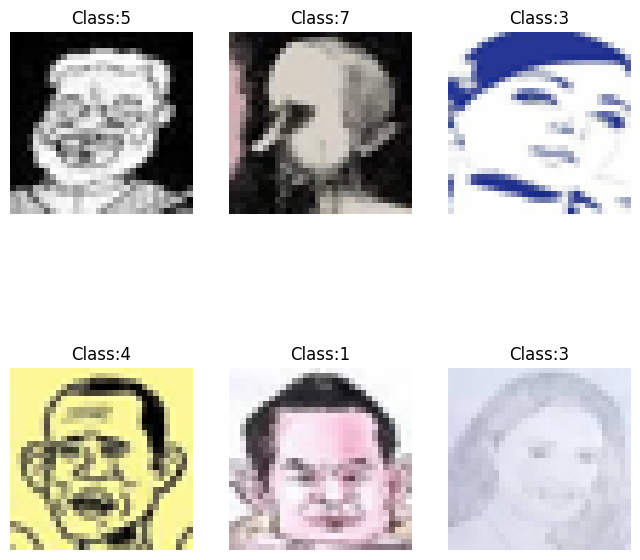

In [6]:
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

ind = np.random.randint(0,y.shape[0],6)
display_images(X[ind,...],y[ind], row=2,col=3)

In [34]:
import numpy as np

class PCA:
    def __init__(self):
        self.mean = None
        self.covariance = None
        self.eigenvectors = None
        self.eigenvalues = None
        
    def standardise(self, X):
        X_standardized = (X - np.mean(X, axis=0))
        if(X_standardized.ndim > 2):
            X_standardized = X_standardized.reshape(X_standardized.shape[0], -1)
        return X_standardized
        
    def calculate_eigens(self, X):
        X_standardized = self.standardise(X)
        Z = (1/np.sqrt(X_standardized.shape[0]-1))*X_standardized
        covariance_matrix = np.matmul(Z.T, Z)
        eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]
        self.eigenvectors = eigenvectors
        self.eigenvalues = eigenvalues
        
    def get_eigenvectors(self):
        return np.real(self.eigenvectors)
    
    def get_eigenvalues(self):
        return np.real(self.eigenvalues)
    
    def reduce_data(self, X, n_components):
        eigenvectors = self.get_eigenvectors()
        selected_eigenvectors = eigenvectors[:,:n_components]
        X_standardized = self.standardise(X)
        reduced_data = np.dot(X_standardized, selected_eigenvectors)
        return reduced_data

In [8]:
pca_1 = PCA()
pca_1.calculate_eigens(X)
reduced_data = pca_1.reduce_data(X, n_components=2)
print(reduced_data)

[[ 15.8405491    3.93425953]
 [ 12.15561698  12.70722811]
 [  3.1718456   -1.14630423]
 ...
 [-10.27903264   0.87396374]
 [  1.40198237  -3.01106201]
 [ -6.78694849  -2.43310135]]


In [9]:
num_components_range = [i for i in range(1, 601)]
reduced_datasets = {}

for num_components in num_components_range:
    reduced_data = pca_1.reduce_data(X, n_components=num_components)
    reduced_datasets[num_components] = reduced_data

print(reduced_datasets)

{1: array([[ 15.8405491 ],
       [ 12.15561698],
       [  3.1718456 ],
       [  4.52533315],
       [ 10.38620962],
       [ -1.68951479],
       [ -4.35391728],
       [  4.21337699],
       [ -0.04024709],
       [  1.09182433],
       [ 15.6299394 ],
       [ 13.74743662],
       [ -2.739257  ],
       [ -1.28305072],
       [ -3.02275833],
       [ -8.88833871],
       [  3.11702415],
       [ -4.74205012],
       [  9.65222908],
       [  8.93317442],
       [  3.8591971 ],
       [ 10.88604563],
       [  3.3949797 ],
       [  1.85383893],
       [ -8.88903061],
       [ -6.235572  ],
       [  6.20228693],
       [ 10.41568788],
       [  8.11166965],
       [ -0.17761744],
       [  6.48964535],
       [  2.40913584],
       [ 16.78704642],
       [  1.4566866 ],
       [  5.56357813],
       [  2.26292038],
       [ -1.70515549],
       [  6.31347529],
       [ 11.92351002],
       [  1.49013335],
       [  5.52878983],
       [  1.50745733],
       [-11.72608229],
       

In [10]:
num_components_range = [i for i in range(1, 601)]
eigenvalues = pca_1.get_eigenvalues()
total_variance = np.sum(eigenvalues)
exp_variance = eigenvalues/total_variance
cumulative_explained_variance_list = [];
cumulative_explained_variance = np.cumsum(exp_variance)
for num_components, explained_variance in zip(num_components_range, cumulative_explained_variance):
    print(f"Num Components: {num_components}, Cumulative Explained Variance: {explained_variance:.4f}")
    cumulative_explained_variance_list.append(explained_variance)

Num Components: 1, Cumulative Explained Variance: 0.3362
Num Components: 2, Cumulative Explained Variance: 0.4196
Num Components: 3, Cumulative Explained Variance: 0.4737
Num Components: 4, Cumulative Explained Variance: 0.5034
Num Components: 5, Cumulative Explained Variance: 0.5303
Num Components: 6, Cumulative Explained Variance: 0.5545
Num Components: 7, Cumulative Explained Variance: 0.5729
Num Components: 8, Cumulative Explained Variance: 0.5908
Num Components: 9, Cumulative Explained Variance: 0.6071
Num Components: 10, Cumulative Explained Variance: 0.6199
Num Components: 11, Cumulative Explained Variance: 0.6308
Num Components: 12, Cumulative Explained Variance: 0.6410
Num Components: 13, Cumulative Explained Variance: 0.6503
Num Components: 14, Cumulative Explained Variance: 0.6591
Num Components: 15, Cumulative Explained Variance: 0.6674
Num Components: 16, Cumulative Explained Variance: 0.6752
Num Components: 17, Cumulative Explained Variance: 0.6830
Num Components: 18, Cum

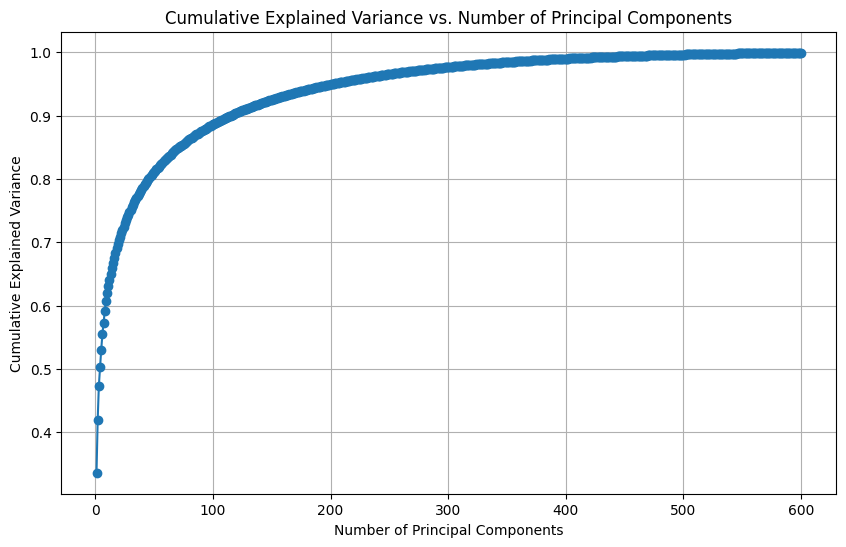

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(num_components_range, cumulative_explained_variance_list, marker='o', linestyle='-')

plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid(True)

plt.show()

In [12]:
data = np.load('data.npy', allow_pickle=True)
pic_data = data[:, 2]
X_pic = [x[0] for x in pic_data]
X_pic = np.array(X_pic)
y = data[:, 3]

pca_2 = PCA()
pca_2.calculate_eigens(X_pic)

reduced_data = pca_2.reduce_data(X_pic, n_components=200)

In [13]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# before dimensionality reduction

knn = KNeighborsClassifier(n_neighbors=12, metric='manhattan')
X_train, X_val, y_train, y_val = train_test_split(
    X_pic, y, test_size=0.2, random_state=42)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)

f1 = f1_score(y_val, y_pred, average='weighted')
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(
    y_val, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_val, y_pred,
                      average='weighted', zero_division=1)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'F1: {f1}')
print(f'Recall: {recall}')

Accuracy: 0.26
Precision: 0.5913541083099907
F1: 0.2304685652038593
Recall: 0.26


In [14]:
# after dimensionality reduction

knn = KNeighborsClassifier(n_neighbors=12, metric='manhattan')
X_train, X_val, y_train, y_val = train_test_split(
    reduced_data, y, test_size=0.2, random_state=42)

knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)

f1 = f1_score(y_val, y_pred, average='weighted')
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(
    y_val, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_val, y_pred,
                      average='weighted', zero_division=1)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'F1: {f1}')
print(f'Recall: {recall}')

Accuracy: 0.22333333333333333
Precision: 0.5862889274468222
F1: 0.1882027110144757
Recall: 0.22333333333333333


In [15]:
num_components_range = range(1, 513)
accuracy_list = []
for num_components in num_components_range:
    reduced_data = pca_2.reduce_data(X_pic, n_components=num_components)
    knn = KNeighborsClassifier(n_neighbors=12, metric='manhattan')
    X_train, X_val, y_train, y_val = train_test_split(
    reduced_data, y, test_size=0.2, random_state=42)

    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_list.append(accuracy)

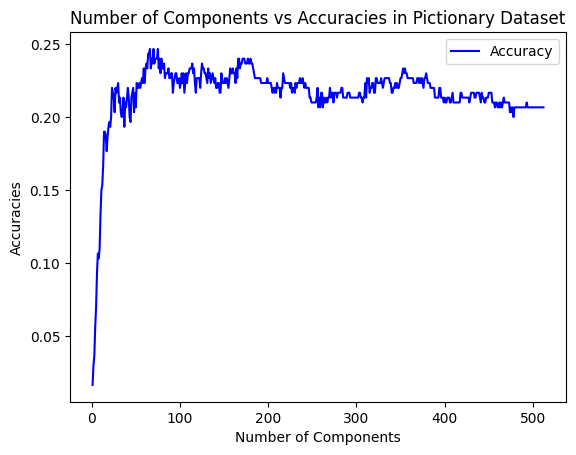

In [16]:
import matplotlib.pyplot as plt

plt.plot(num_components_range, accuracy_list, label='Accuracy', color='blue', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Accuracies')
plt.title('Number of Components vs Accuracies in Pictionary Dataset')
plt.legend()
plt.show()

In [18]:
pca_3 = PCA()
pca_3.calculate_eigens(X)

In [27]:
num_components_range = [1, 10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1200, 1400, 1600, 1800, 2000, 2200, 2400, 2600, 2800, 3000, 3072]
accuracy_list = []
for num_components in num_components_range:
    reduced_data = pca_3.reduce_data(X, n_components=num_components)
    knn = KNeighborsClassifier(n_neighbors=12, metric='manhattan')
    X_train, X_val, y_train, y_val = train_test_split(
    reduced_data, y_cfw, test_size=0.2, random_state=42)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    accuracy_list.append(accuracy)

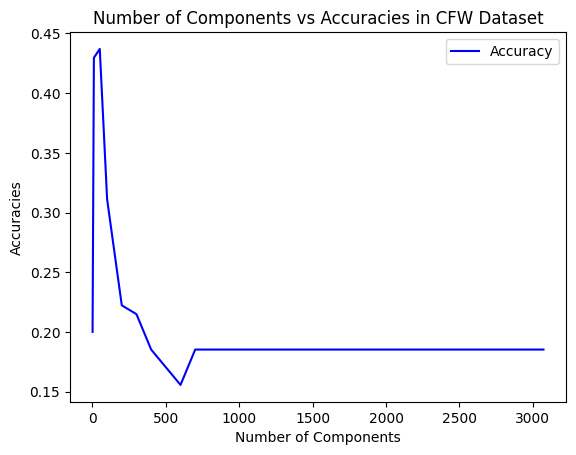

In [28]:
import matplotlib.pyplot as plt

plt.plot(num_components_range, accuracy_list, label='Accuracy', color='blue', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Accuracies')
plt.title('Number of Components vs Accuracies in CFW Dataset')
plt.legend()
plt.show()

In [45]:
import pandas as pd
drawer_data = pd.read_csv("smai_assignment_pictionary/drawer_attributes.csv")
guesser_data=pd.read_csv("smai_assignment_pictionary/guesser_attributes.csv")
drawer_data = np.array(drawer_data)
guesser_data = np.array(guesser_data)

In [37]:
pca_4 = PCA()
pca_4.calculate_eigens(drawer_data)
eigenvectors = pca_4.get_eigenvectors()
# print(eigenvectors)

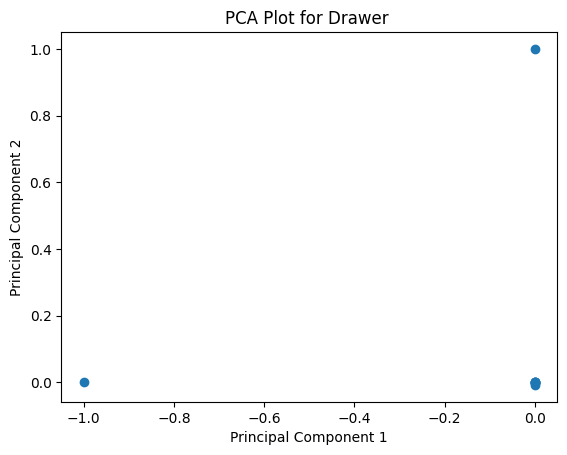

In [38]:
import matplotlib.pyplot as plt

plt.scatter(eigenvectors[:, 0], eigenvectors[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot for Drawer ')
plt.show()

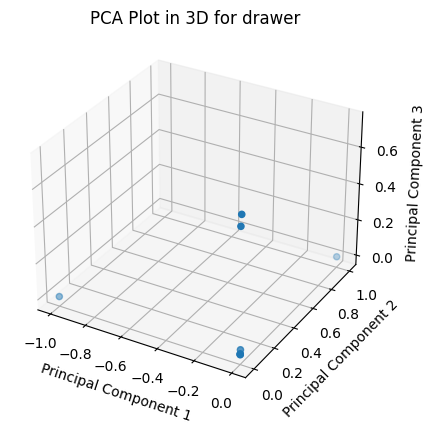

In [42]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(eigenvectors[:, 0], eigenvectors[:, 1], eigenvectors[:, 2])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.title('PCA Plot in 3D for drawer')
plt.show()

In [46]:
pca_5 = PCA()
pca_5.calculate_eigens(guesser_data)
eigenvectors = pca_5.get_eigenvectors()
# print(eigenvectors)

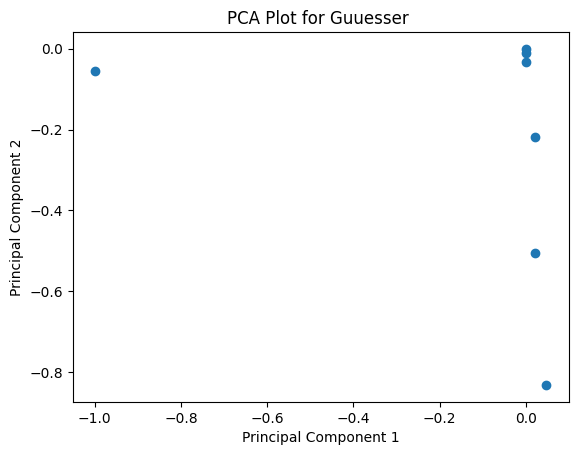

In [47]:
plt.scatter(eigenvectors[:, 0], eigenvectors[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot for Guuesser ')
plt.show()

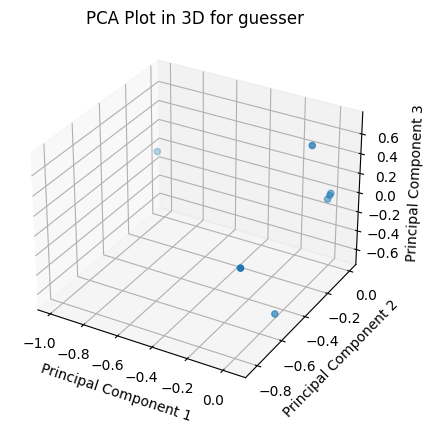

In [48]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(eigenvectors[:, 0], eigenvectors[:, 1], eigenvectors[:, 2])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.title('PCA Plot in 3D for guesser')
plt.show()